# <font color='red'> <center> Advanced Data Mining</font>
# <font color='red'> <center> Tutorial : Association rules </font>
## <font color='red'> <center> 2022 - 2023</font>
### <font> <center> Python version initially prepared by Fayçal HAFID. Updated by Lina FAHED, Philippe LENCA</font>

---
---

# 1- Data preparation
The package **mlxtend** in not initially installed with Python. You can use *pip install mlxtend* or follow steps here http://rasbt.github.io/mlxtend/installation/ 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


---
---
## Importing dataset 

In [6]:
#Question 1

In [7]:
data = pd.read_csv('groceries.csv',delimiter=';',header=None,names=['Products'])

In [8]:
data

Products
0     citrus fruit,semi-finished bread,margarine,rea...
1                          tropical fruit,yogurt,coffee
2                                            whole milk
3           pip fruit,yogurt,cream cheese ,meat spreads
4     other vegetables,whole milk,condensed milk,lon...
...                                                 ...
9830  sausage,chicken,beef,hamburger meat,citrus fru...
9831                                  cooking chocolate
9832  chicken,citrus fruit,other vegetables,butter,y...
9833  semi-finished bread,bottled water,soda,bottled...
9834  chicken,tropical fruit,other vegetables,vinega...

[9835 rows x 1 columns]

In [9]:
data.values

array([['citrus fruit,semi-finished bread,margarine,ready soups'],
       ['tropical fruit,yogurt,coffee'],
       ['whole milk'],
       ...,
       ['chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags'],
       ['semi-finished bread,bottled water,soda,bottled beer'],
       ['chicken,tropical fruit,other vegetables,vinegar,shopping bags']],
      dtype=object)

---
---
## Splitting values

In [10]:
df = list(data["Products"].apply(lambda x:x.split(',')))
df

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

---
---
## Encoding data

In [11]:
encoder= TransactionEncoder()
encoded_data = encoder.fit(df).transform(df)
df = pd.DataFrame(encoded_data,columns=encoder.columns_)
df

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
9830                  False     False             False             False   
9831                  False     False             False             False   
9832                  False     False             False             False   
9833                  False     False             False             False   
9834                  False     False             False             False   

      baby cosmetics  baby food   bags  baking powder  bathroom cleaner  \
0              False      False  False          False             False   
1              False      False  False          False             False   
2              False      False  False          False             False   
3              False      False  False          False             False   
4              False      False  False          False             False   
...              ...        ...    ...            ...               ...   
9830           False      False  False          False             False   
9831           False      False  False          False             False   
9832           False      False  False          False             False   
9833           False      False  False          False             False   
9834           False      False  False          False             False   

       beef  ...  turkey  vinegar  waffles  whipped/sour cream  whisky  \
0     False  ...   False    False    False               False   False   
1     False  ...   False    False    False               False   False   
2     False  ...   False    False    False               False   False   
3     False  ...   False    False    False               False   False   
4     False  ...   False    False    False               False   False   
...     ...  ...     ...      ...      ...                 ...     ...   
9830   True  ...   False    False    False                True   False   
9831  False  ...   False    False    False               False   False   
9832  False  ...   False    False    False               False   False   
9833  False  ...   False    False    False               False   False   
9834  False  ...   False     True    False               False   False   

      white bread  white wine  whole milk  yogurt  zwieback  
0           False       False       False   False     False  
1           False       False       False    True     False  
2           False       False        True   False     False  
3           False       False       False    True     False  
4           False       False        True   False     False  
...           ...         ...         ...     ...       ...  
9830        False       False        True   False     False  
9831        False       False       False   False     False  
9832        False       False       False    True     False  
9833        False       False       False   False     False  
9834        False       False       False   False     False  

[9835 rows x 169 columns]

List of products :

In [12]:

df.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'baby food', 'bags',
       'baking powder', 'bathroom cleaner', 'beef',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=169)

---
---
# 2- Generation of Frequent Itemset

In [13]:
#Questions 2 and 3

In [14]:
apr=apriori(df, min_support=0.02, use_colnames=True, max_len=1)
apr.sort_values(by='support',ascending=False).head(10)

support            itemsets
57  0.255516        (whole milk)
39  0.193493  (other vegetables)
43  0.183935        (rolls/buns)
49  0.174377              (soda)
58  0.139502            (yogurt)
5   0.110524     (bottled water)
44  0.108998   (root vegetables)
53  0.104931    (tropical fruit)
47  0.098526     (shopping bags)
46  0.093950           (sausage)

## With different min_len/max_len

In [15]:
 #Question 4

### min_len=max_len=2

In [16]:
apr_2=apriori(df, min_support=0.02, use_colnames=True, max_len=5)
apr_2['len']=apr_2.apply(lambda x : len(x['itemsets']),axis=1)
apr_2.loc[apr_2['len']==2].sort_values(by='support',ascending=False).drop(labels=['len'],axis=1).head(10)

support                             itemsets
91   0.074835       (other vegetables, whole milk)
103  0.056634             (rolls/buns, whole milk)
119  0.056024                 (whole milk, yogurt)
106  0.048907        (whole milk, root vegetables)
85   0.047382  (other vegetables, root vegetables)
92   0.043416           (other vegetables, yogurt)
84   0.042603       (rolls/buns, other vegetables)
115  0.042298         (tropical fruit, whole milk)
113  0.040061                   (soda, whole milk)
101  0.038332                   (rolls/buns, soda)

### min_len=max_len=3

In [17]:
apr_2.loc[apr_2['len']==3].sort_values(by='support',ascending=False).drop(labels=['len'],axis=1)

support                                         itemsets
120  0.023183  (other vegetables, whole milk, root vegetables)
121  0.022267           (other vegetables, whole milk, yogurt)

### min_len=max_len=4

In [18]:
apr_2.loc[apr_2['len']==4].sort_values(by='support',ascending=False).drop(labels=['len'],axis=1)

Empty DataFrame
Columns: [support, itemsets]
Index: []

---
Note: Generally, when we try to extract itemsets with more items (longer itemsets), we remark that the support value tend to be smaller for these itemsets (it decreses in general), and that less itemsets are extracted from the algorithm. Here we do not have any itemset of length 4 and   support >= 0.02. (note that some exception can exist)


## With no max_len

In [19]:
#Question 5

In [20]:
apr_limitless=apriori(df, min_support=0.02, use_colnames=True)
apr_limitless.sort_values(by='support',ascending=False)

support                         itemsets
57  0.255516                     (whole milk)
39  0.193493               (other vegetables)
43  0.183935                     (rolls/buns)
49  0.174377                           (soda)
58  0.139502                         (yogurt)
..       ...                              ...
75  0.020539        (whole milk, frankfurter)
60  0.020437       (bottled beer, whole milk)
76  0.020437  (whole milk, frozen vegetables)
96  0.020437      (tropical fruit, pip fruit)
67  0.020031       (other vegetables, butter)

[122 rows x 2 columns]

In [21]:
apr_limitless['len']=apr_limitless.apply(lambda x : len(x['itemsets']),axis=1)

In [22]:
apr_limitless['len'].value_counts().sort_index()

1    59
2    61
3     2
Name: len, dtype: int64

When making the itemsets lenth illimited, we obtain the same result as before : with support  >= 0.02, the itemsets length does not exceed 3


---
---
### Note
A precision about the tutorial of frequent patterns in order to explain why we have 59 frequent 1-itemsets (itemsets of length 1), and 61 frequent 2-itemsets (itemsets of length 2).. Why the number of frequent itemsets increases for length 2 and then decreases for length 3 (we have only 2 frequent 3-itemsets) ?


The explanation of this phenomenon is related to the dataset and experimentation parameters : the number of candidate itemsets (that are not yet pruned by the minimum support threshold) and the support threshold.

Notice that the number of candidats increases by default due to combinations of items.


Let us take an example of a mini-dataset, with two transactions, and items A, B, C, D, and let us extract frequent itemsets of length 1, and frequent itemsets  of length 2, for minsup = 0.9 (support threshold)


- Transaction 1 : A B C D
- Transaction 2 : A B C D


We have the following 4 candidate Itemsets of length 1 : A, B, C, D, their suppprt = 1 $\Longrightarrow$ they are frequent itemsets.

We have 6 candidate Itemsets of length 2 : AB, AC, AD, BC, BD, CD. All of them respect the minimum support threshold : their suppprt = 1 $\Longrightarrow$ they are also frequent itemsets.

Remember that the combination of 4 items to construct  2-itemsets (itemsets of length 2) = 6. 

Thus in order to formulate that : 
- C is the combination. 
- n is the number of items. 
- r is the number of items to be chosen (= length of the itemsets) 
- nCr = n!/(r!(n-r)!) 


Thus, for longer itemsets, the number of candidates increases by default (due to combinations). 

Then, when evaluating the support of candidates, some of them (or all, as in the above example) are considered as frequent itemsets (when their support >= minsupp). In the above example, we have more frequent itemsets of length 2 that itemsets of length 1 (we could have had less if the example was different).. 

However, the longer are itemsets, the less likely they are to be frequent. 

---
---

# 3- Rule generation and visualization

In [23]:
#Question 6

In [28]:
apr_df=apriori(df, min_support=0.001, use_colnames=True)
rules=association_rules(apr_df, metric='confidence', min_threshold=0.6, support_only=False)
rules  ## this command can take several second to execute

antecedents         consequents  \
0                                             (cereals)        (whole milk)   
1                                               (honey)        (whole milk)   
2                                                (rice)        (whole milk)   
3                         (soda, Instant food products)    (hamburger meat)   
4                       (yogurt, Instant food products)        (whole milk)   
...                                                 ...                 ...   
2956  (pip fruit, tropical fruit, yogurt, whole milk...  (other vegetables)   
2957  (tropical fruit, yogurt, rolls/buns, other veg...        (whole milk)   
2958  (tropical fruit, rolls/buns, other vegetables,...            (yogurt)   
2959  (whipped/sour cream, tropical fruit, yogurt, o...        (whole milk)   
2960  (whipped/sour cream, tropical fruit, yogurt, w...  (other vegetables)   

      antecedent support  consequent support   support  confidence       lift  \
0               0.005694            0.255516  0.003660    0.642857   2.515917   
1               0.001525            0.255516  0.001118    0.733333   2.870009   
2               0.007626            0.255516  0.004677    0.613333   2.400371   
3               0.001932            0.033249  0.001220    0.631579  18.995654   
4               0.001423            0.255516  0.001118    0.785714   3.075010   
...                  ...                 ...       ...         ...        ...   
2956            0.001830            0.193493  0.001322    0.722222   3.732557   
2957            0.001830            0.255516  0.001322    0.722222   2.826524   
2958            0.002034            0.139502  0.001322    0.650000   4.659439   
2959            0.001729            0.255516  0.001118    0.647059   2.532361   
2960            0.001627            0.193493  0.001118    0.687500   3.553107   

      leverage  conviction  
0     0.002206    2.084555  
1     0.000729    2.791815  
2     0.002729    1.925390  
3     0.001156    2.624040  
4     0.000755    3.474259  
...        ...         ...  
2956  0.000968    2.903427  
2957  0.000854    2.680142  
2958  0.001038    2.458566  
2959  0.000677    2.109371  
2960  0.000804    2.580824  

[2961 rows x 9 columns]

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

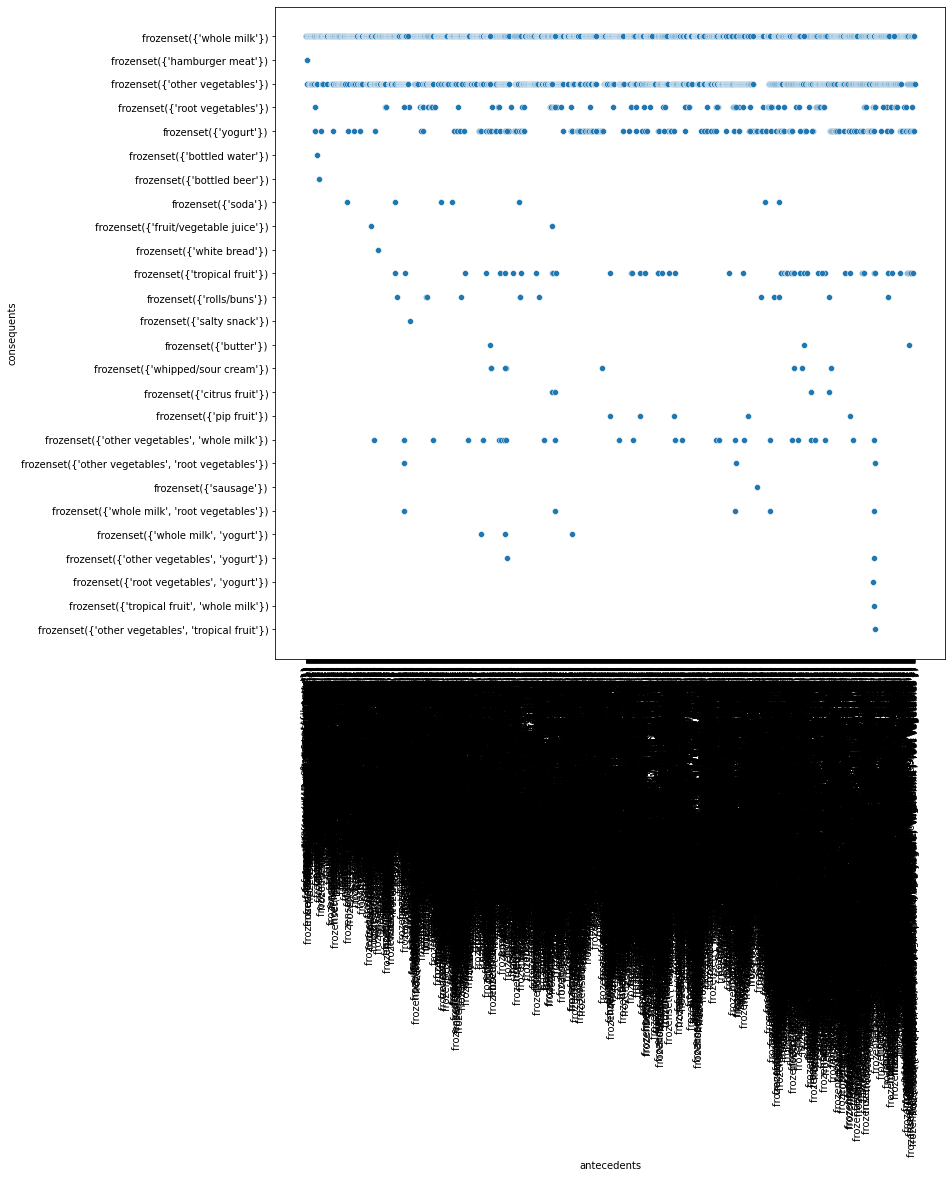

In [30]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=rules.astype(str),x='antecedents',y='consequents')
plt.xticks(rotation=90);


---
---
## Setting support as color

In [31]:
rules2=rules.copy()
rules2['antecedents']=rules2['antecedents'].astype(str)
rules2['consequents']=rules2['consequents'].astype(str)

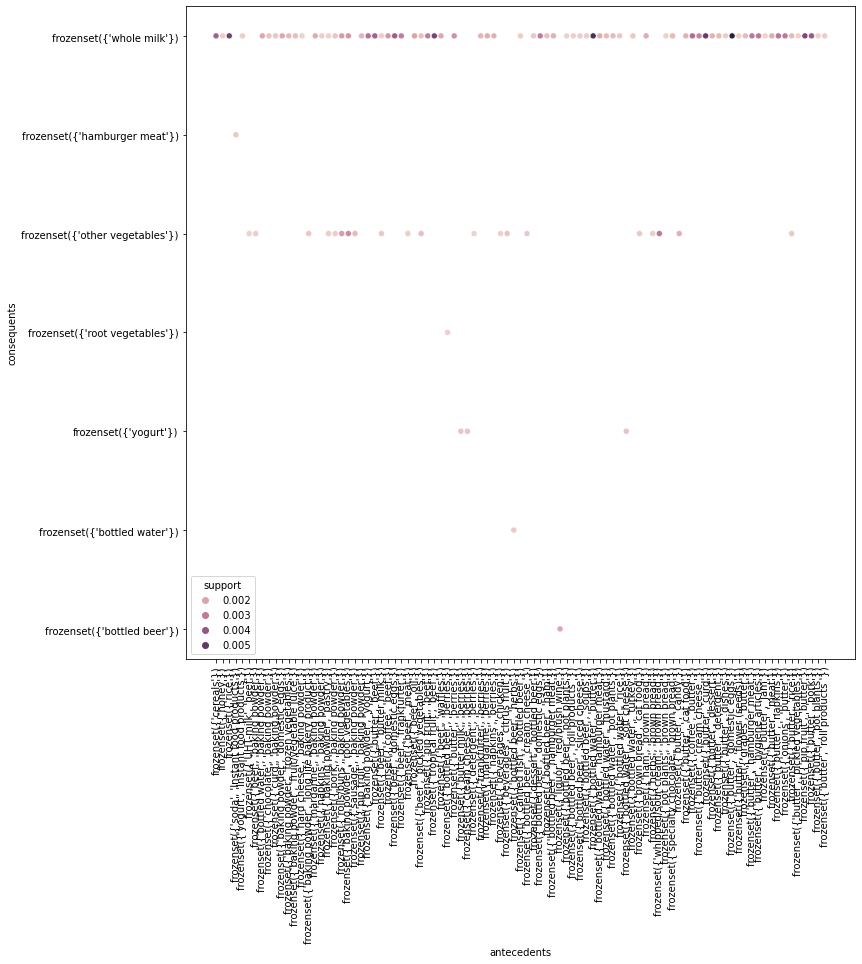

In [32]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=rules2.iloc[:100,:],x='antecedents',y='consequents',hue='support')
plt.xticks(rotation=90);

In [33]:
#Question 8

In [34]:
rules.sort_values(by='lift',ascending=False).head(10)

antecedents  \
2951  (other vegetables, tropical fruit, whole milk,...   
3                         (soda, Instant food products)   
2954         (whole milk, root vegetables, oil, yogurt)   
2437              (tropical fruit, butter, white bread)   
2953   (other vegetables, root vegetables, oil, yogurt)   
461                                     (soda, popcorn)   
2952  (tropical fruit, whole milk, oil, root vegetab...   
2818                         (whole milk, rice, yogurt)   
2949          (tropical fruit, whole milk, oil, yogurt)   
319                             (processed cheese, ham)   

                              consequents  antecedent support  \
2951            (root vegetables, yogurt)            0.001525   
3                        (hamburger meat)            0.001932   
2954   (other vegetables, tropical fruit)            0.001525   
2437           (other vegetables, yogurt)            0.001322   
2953         (tropical fruit, whole milk)            0.001423   
461                         (salty snack)            0.001932   
2952           (other vegetables, yogurt)            0.001525   
2818  (other vegetables, root vegetables)            0.001830   
2949  (other vegetables, root vegetables)            0.001423   
319                         (white bread)            0.003050   

      consequent support   support  confidence       lift  leverage  \
2951            0.025826  0.001017    0.666667  25.813648  0.000977   
3               0.033249  0.001220    0.631579  18.995654  0.001156   
2954            0.035892  0.001017    0.666667  18.574127  0.000962   
2437            0.043416  0.001017    0.769231  17.717528  0.000959   
2953            0.042298  0.001017    0.714286  16.887019  0.000957   
461             0.037824  0.001220    0.631579  16.697793  0.001147   
2952            0.043416  0.001017    0.666667  15.355191  0.000951   
2818            0.047382  0.001322    0.722222  15.242608  0.001235   
2949            0.047382  0.001017    0.714286  15.075107  0.000949   
319             0.042095  0.001932    0.633333  15.045491  0.001803   

      conviction  
2951    2.922522  
3       2.624040  
2954    2.892323  
2437    4.145196  
2953    3.351957  
461     2.611620  
2952    2.869751  
2818    3.429426  
2949    3.334164  
319     2.612469

In [35]:
print('Rule with the highest lift ('+str(rules.sort_values(by='lift',ascending=False).head(1)['lift'].values[0])+') :\n'+str(rules.sort_values(by='lift',ascending=False).head(1)['antecedents'].values[0])+' ==> '+str(rules.sort_values(by='lift',ascending=False).head(1)['consequents'].values[0]))

Rule with the highest lift (25.81364829396325) :
frozenset({'other vegetables', 'tropical fruit', 'whole milk', 'oil'}) ==> frozenset({'root vegetables', 'yogurt'})


In [36]:
rules.loc[rules.confidence>0.9].sort_values(by='confidence',ascending=False)

antecedents         consequents  \
1586       (flour, whipped/sour cream, root vegetables)        (whole milk)   
2700       (tropical fruit, whole milk, ham, pip fruit)  (other vegetables)   
1884     (pip fruit, root vegetables, hygiene articles)        (whole milk)   
1891  (whipped/sour cream, root vegetables, hygiene ...        (whole milk)   
1306            (napkins, cream cheese , domestic eggs)        (whole milk)   
...                                                 ...                 ...   
2434  (other vegetables, tropical fruit, butter, whi...            (yogurt)   
2450    (tropical fruit, butter, sliced cheese, yogurt)        (whole milk)   
2451  (tropical fruit, butter, sliced cheese, whole ...            (yogurt)   
1758  (tropical fruit, whipped/sour cream, fruit/veg...  (other vegetables)   
58                             (liquor, red/blush wine)      (bottled beer)   

      antecedent support  consequent support   support  confidence       lift  \
1586            0.001729            0.255516  0.001729    1.000000   3.913649   
2700            0.001118            0.193493  0.001118    1.000000   5.168156   
1884            0.001017            0.255516  0.001017    1.000000   3.913649   
1891            0.001017            0.255516  0.001017    1.000000   3.913649   
1306            0.001118            0.255516  0.001118    1.000000   3.913649   
...                  ...                 ...       ...         ...        ...   
2434            0.001118            0.139502  0.001017    0.909091   6.516698   
2450            0.001118            0.255516  0.001017    0.909091   3.557863   
2451            0.001118            0.139502  0.001017    0.909091   6.516698   
1758            0.002135            0.193493  0.001932    0.904762   4.675950   
58              0.002135            0.080529  0.001932    0.904762  11.235269   

      leverage  conviction  
1586  0.001287         inf  
2700  0.000902         inf  
1884  0.000757         inf  
1891  0.000757         inf  
1306  0.000833         inf  
...        ...         ...  
2434  0.000861    9.465480  
2450  0.000731    8.189324  
2451  0.000861    9.465480  
1758  0.001519    8.468327  
58    0.001760    9.654448  

[128 rows x 9 columns]

We have 128 association rules for which the confidence > 0.9

---
---
### Matrix plots

In [37]:
 #Question 9

### Support as color

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

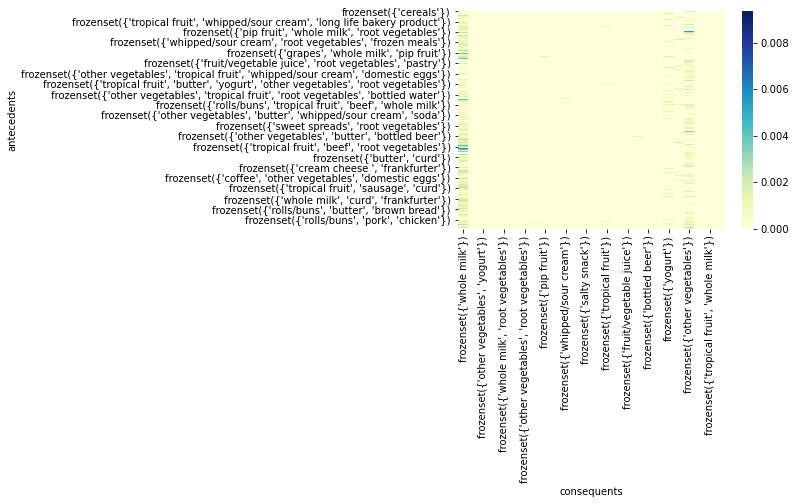

In [38]:
sns.heatmap(rules.pivot("antecedents", "consequents", "support").fillna(0),cmap="YlGnBu")

### Lift as color

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

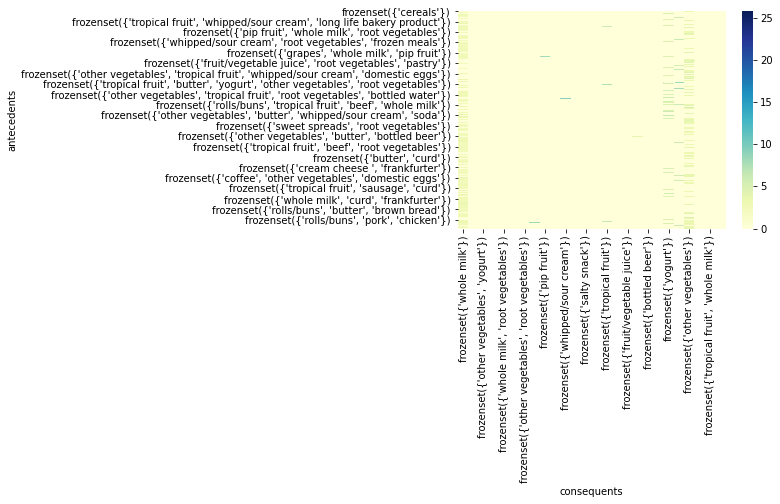

In [39]:
sns.heatmap(rules.pivot("antecedents", "consequents", "lift").fillna(0),cmap="YlGnBu")

---
---
### Confidence as color

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

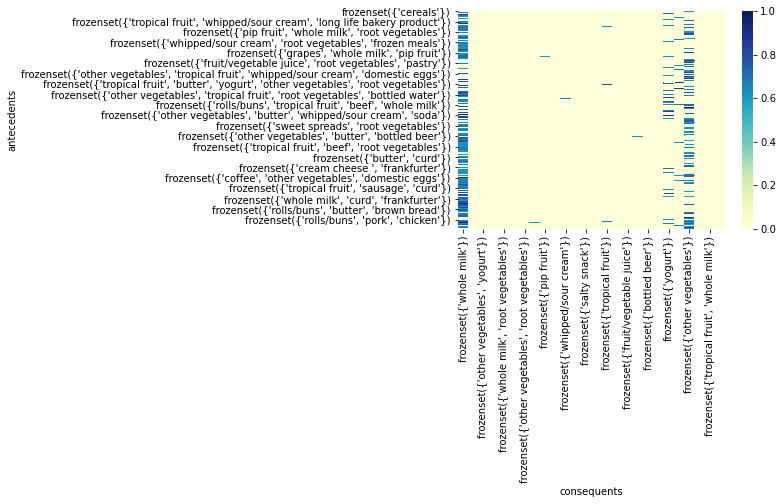

In [40]:
sns.heatmap(rules.pivot("antecedents", "consequents", "confidence").fillna(0),cmap="YlGnBu")

---
---
## Graph visualization

In [41]:
#Question 10

In [42]:
import networkx as nx
import numpy as np

In [45]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()   
    color_map=[]
    N = 10
    colors = ['blue','red','black','green','yellow']   
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   


    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])


        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       



    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
    ##nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            


    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

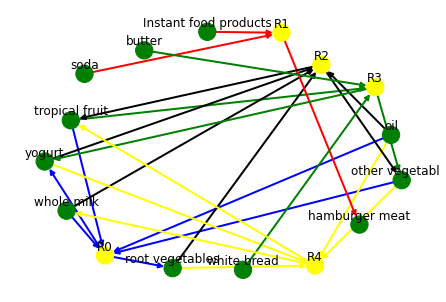

In [46]:
draw_graph(rules.sort_values(by='lift',ascending=False), 5)